In [1]:
import qiskit
import numpy as np
import sys
sys.path.insert(1,'../')

from vqa.circuits import *
from vqa.vqm import *
from vqa.bounds import *
from vqa.fitting import *
from vqa.entanglement import concentratable_entanglement

/Users/anhkhoi/Documents/PhysRes/Quantum_Metrology/Full_code/vmetro/run/../vqa/circuits.py:287: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if values[i] == 'random':


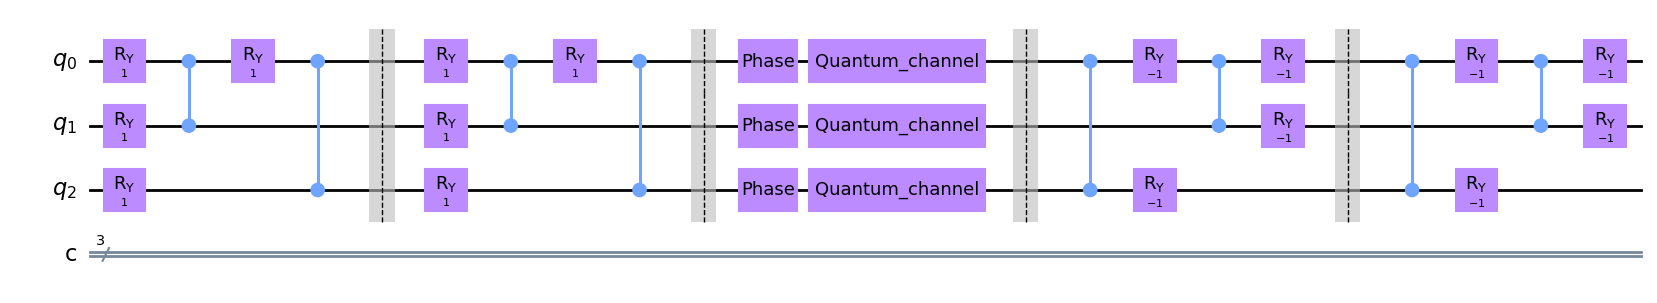

In [2]:
num_qubits = 3
t = 1.0

cirs =[star_ansatz, u_phase, dephasing, star_ansatz_inv]
coefs = [2,t,t,2] #num_players, time, 
phases = np.array([np.pi/6., np.pi/6., np.pi/6.])

lamb = 0.5
y = vqa.constants.lamb2y(t,lamb) #fdephasing
params = create_params(cirs,coefs,num_qubits,[[1],phases,[y],[1]])

# setup a model 
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
model = qc_add(qc, cirs, coefs, params)
model.draw('mpl')

In [ ]:
# training sld bound
# allways remember reset qc

import matplotlib.pyplot as plt
num_steps = 100

params, costs = training(qc,
               cirs,
               coefs,  
               params,
               which_train = [0,-1],
               cost_func = bound_sld_cls,
               grad_func = grad_cost,
               opt_func = adam,
               num_steps = num_steps)

# plot
iterations = list(range(1, num_steps+1))
plt.plot(iterations, np.real(costs), '-')
plt.xlim(0, num_steps)

0 0.6346633500315289
1 0.6210063181159433
2 0.6097005005961452
3 0.5994902549124903
4 0.5902123951347104
5 0.5815331371375372
6 0.5731905677024918
7 0.5652462235153025
8 0.5578101145488407
9 0.5505983867725242
10 0.5435514328843332
11 0.536622897927898
12 0.5299384877861076
13 0.52350640160406
14 0.5172146694263238
15 0.5109304862485649
16 0.5045445835904538
17 0.49767055966542795
18 0.49028613036852076
19 0.4825001426837606
20 0.4744111473351419
21 0.46653817224271676
22 0.45773805225639175
23 0.4490785763876569
24 0.44117659649574104
25 0.43233634467047577
26 0.4241701370339398
27 0.4175290493945747
28 0.41059947441846034
29 0.40471508660995625
30 0.397840388519366
31 0.3916354006642865
32 0.3855348480849401
33 0.3792212446992651
34 0.37304265707238704
35 0.3670178979309302
36 0.36141225088839946
37 0.3541503915390971
38 0.35123138082892313
39 0.3426125964730322
40 0.34040259318635435
41 0.33001158330115177
42 0.3258387645220967
43 0.3166775259685892
44 0.30711429217502495
45 0.30478

In [ ]:
np.savetxt("../experiments/star_ansatz/" + str(num_qubits) + "/dephasing/costs_01.csv", costs, delimiter=",")
np.savetxt("../experiments/star_ansatz/" + str(num_qubits) + "/dephasing/params_01.csv", np.concatenate((params[0],params[-1]), axis=None), delimiter=",")

In [9]:
# quantum fisher information matrix

qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
qfim = sld_qfim(qc,cirs,coefs,params)
#print(qfim)

# cfim
cfim = vqa.bounds.cfim(qc,cirs,coefs,params)
#print(cfim)


# cls bound and quantum bound
cb = cls_bound(qc,cirs,coefs,params)
qd = sld_bound(qc, cirs, coefs, params)
rb = rld_bound(qc, cirs, coefs, params)

inv_cfim = inv(cfim + np.eye(len(cfim)) * 10e-10)
inv_qfim = inv(qfim + np.eye(len(qfim)) * 10e-10)

# calcualte concentratable_entanglement
qc1 = star_ansatz(qc.copy(), coefs[0], params[0])
ce = vqa.entanglement.concentratable_entanglement(qc1)

print(cb, qd, rb, np.trace(cfim @ inv_qfim),ce)

0.9471171319292132 0.6317835943451846 0.5828102813532363 1.9802522772097348 0.08389999999999997
